### Import Libraries

In [35]:
"If it does not work use code below while running this notebook in this dir."
# import sys
# import os
# sys.path.append(os.path.abspath(os.getcwd()))

from mytorch import Tensor
from mytorch import activation as active_func
from mytorch import loss as loss_func
from mytorch import optimizer as optim 
from mytorch import layer as nn

import numpy as np
import matplotlib.pyplot as plt

### Simple Network
here you have to define a simple linear layer to find coefficients of x_i in below problem. <br>
y = ax_1 + bx_2 + cx_3 <br><br>
![simple network.drawio.png](<attachment:simple network.drawio.png>)
<br><br>
weights of this linear layer is your answer. 
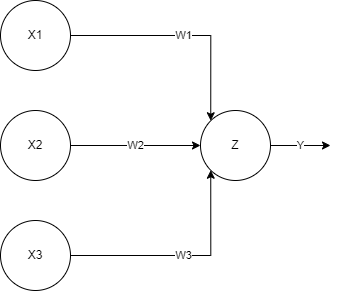

### Generate Data

In [36]:
"TODO: set coefficients"
a = 0.5
b = 0.5
c = 0.5

data_numbers = 100

X = Tensor(np.random.randn(data_numbers, 3))
coef = Tensor(np.array([[a], [b], [c]]))
y = X @ coef + 5

### Model (test)

In [37]:
l = nn.Linear(3, 1, need_bias=False)

"TODO: define an optimizer"
optimizer = optim.SGD([l], learning_rate=0.005)

"TODO: deficne a loss function"
criterion= loss_func.MeanSquaredError

"TODO: print weight and bias of linear layer"
print("initial W and bias:")
print(l.weight)
print(l.bias)

initial W and bias:
Tensor([[-0.3227433 ]
 [-0.2107445 ]
 [-1.14824187]], requires_grad=True)
None


### Train Network

In [38]:
# l = nn.Linear(3, 1, need_bias=False)

# "TODO: define an optimizer"
# optimizer = optim.SGD([l], learning_rate=0.01)

# "TODO: deficne a loss function"
# criterion= loss_func.MeanSquaredError

# "TODO: print weight and bias of linear layer"
# print("initial W and bias:")
# print(l.weight)
# print(l.bias)

batch_size = 50
epoch_number = 100
epLoss = []

for epoch in range(epoch_number):
    epoch_loss = 0.0

    # zero grad in each epoch
    optimizer.zero_grad()
    i=0
    for start in range(0, data_numbers, batch_size):
        # print(f'--------------------------------------------------------------')
        # print(f'iteration: {i}')
        i+=1
        end = start + batch_size

        inputs = X[start:end]
        outputs = y[start:end]
        # outputs.data = outputs.data.reshape(batch_size, 1)

        # print(f'inputs: {inputs}')

        # TODO: predicted
        predicted_result = l.forward(inputs)
        # print(f'predicted result:\n {predicted_result}')
        # print(f'actual result:\n {outputs}')

        # TODO: calculate MSE loss
        loss= criterion(predicted_result, outputs)
        # print(f'loss depends on:\n {loss.depends_on}')

        # TODO: backward
        loss.backward()
        # loss.backward(Tensor(1.0, requires_grad=True))

        # TODO: add loss to epoch_loss
        epoch_loss += loss.data
        # print(f'epoch_loss: {epoch_loss}')

        # TODO: update w and b using optimizer
        optimizer.step()
        
    epLoss.append(epoch_loss)
    

### Evaluate

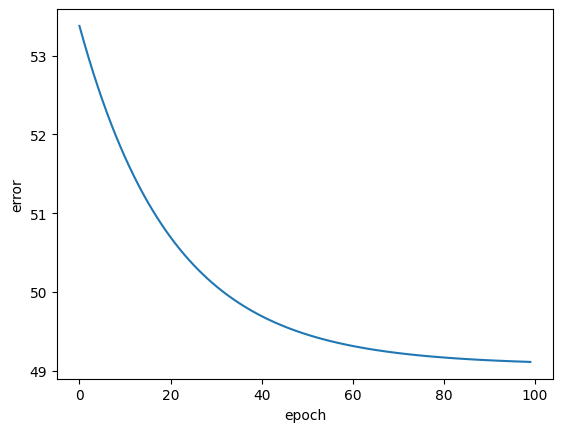


OUT W and bias:
Tensor([[ 0.42062698]
 [ 0.15771106]
 [-0.25341388]], requires_grad=True)
None


In [39]:
plt.plot(epLoss, label='Error')
plt.xlabel('epoch')
plt.ylabel('error')
plt.show()

print("\nOUT W and bias:")
print(l.weight)
print(l.bias)